In [3]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [17]:
# Importing the dataset
DATASET_COLUMNS=['id','tweet_id','tweet','location','entites','verified','user_description']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('tweets.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(5)

,,,,,,,,,,,id,tweet_id,tweet,location,entites,verified,user_description
9621,2022-08-27 09:35:38.403717+00,Perpetrators Free InSSRCase,1563457142496972801,2022-08-27 09:23:25+00,sushantmeans2,Sushant Means Inspiration,NaN,189,"RT @kundu_koushani: Even Goa police is more credible then CBI in SSR case. Sonali Phogat's culprits are arrested in 24hrs, truth coming outâ¦",NaN,en,141,2022-06-26,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False
11355,2022-08-27 09:37:22.862579+00,Perpetrators Free InSSRCase,1563450665783160832,2022-08-27 08:57:40+00,Sushant53187952,Sushant forever,Justice for Sushant Singh Rajput,328,RT @rd20082022: Thread 4\nCDR was taken into cognizance for Sushant and Disha s murder?\n@ips_nupurprasad @PMOIndia @HMOIndia\nPerpetratorsâ¦,NaN,en,25,2021-12-13,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter Web App,False
8828,2022-08-26 13:58:12.78839+00,CBI Unfold D Truth InSSRCase,1563151322253492225,2022-08-26 13:08:11+00,hereforjusticeM,Awakened Soul â¡ï¸ðâï¸,Attachment is the Root of all suffering...,1800,RT @Justice78602373: Thread 1\n\nðWho Killed SSR and Whyâ\n\n@ips_nupurprasad @IPS_Association @PMOIndia @HMOIndia @AmitShah @KirenRijiju \n \nCBâ¦,In another world,en,132,2020-10-14,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False
8462,2022-08-26 13:57:46.800912+00,CBI Unfold D Truth InSSRCase,1563152883365064705,2022-08-26 13:14:24+00,ChintuJainHS,Chintu || Justice 4 Sushant ð±,Here only for SSR Justice.\nRTs and likes are not endorsements.,1207,RT @itsRamya_2506: Sachin Vaze key 2 SSR Disha Salian truth\nCBI Unfold D Truth InSSRCase\n@narendramodi @AmitShah @PMOIndia @HMOIndia @ips_nâ¦,Earth,en,39,2020-08-30,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False
7654,2022-08-26 13:56:44.708262+00,CBI Unfold D Truth InSSRCase,1563158120574005248,2022-08-26 13:35:12+00,ATUL7735,ATUL,NaN,301,RT @privin07: @ATUL7735 Thanks a lot Atul for this beautiful msg &amp; awesome GIF ððð\n\nWe all are doing great to make Sushant win this fight oâ¦,India,en,24,2011-03-15,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False


In [18]:
df.head()

,,,,,,,,,,,id,tweet_id,tweet,location,entites,verified,user_description
id,hashtag_generation_time,searched_hashtag,tweet_id,tweet_created_at,screen_name,name,user_description,followers_count,tweet,location,iso_language_code,retweet_count,user_created_at,favorite_count,entities,tweet_source,verified
7549,2022-08-26 13:56:37.490901+00,CBI Unfold D Truth InSSRCase,1563158353391779844,2022-08-26 13:36:08+00,ATUL7735,ATUL,NaN,301,RT @privin07: @divine__ssr @ATUL7735 Thanks a lot Diyu for such lovely words ðð¥°\n\nWe all are amazing and Sushi is proud of us allð\n\nCBI Unfoâ¦,India,en,4,2011-03-15,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False
6327,2022-08-26 13:54:52.480426+00,CBI Unfold D Truth InSSRCase,1563163059002101762,2022-08-26 13:54:50+00,BabyPink1803,Alli,Justice 4 Disha & SSR ~ :): ðð¦ð« ~Your vibes speaks louder than your words~âï¸ âï¸ Har Har Mahadev ð±,1115,RT @keesain99: CBI Unfold D Truth InSSRCase \n\nTruth and justice are above and beyond everything for the greatness of nations depends on theâ¦,Australia,en,114,2012-08-21,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False
6328,2022-08-26 13:54:52.618819+00,CBI Unfold D Truth InSSRCase,1563163056934334464,2022-08-26 13:54:49+00,Tanutoor85,ððððð(TanuToor)ð,Anshu â¥ï¸|2.0 â¥ï¸|Anaya â¥ï¸|Aanshâ¥ï¸Luvâ¥ï¸|Kokdooâ¥ï¸|Satyaâ¥ï¸Saurabhâ¥ï¸,2776,RT @ChintuJainHS: @SatyaSSRian1 @PMOIndia @DoPTGoI CBI Unfold D Truth InSSRCaseð¥,Canada,en,2,2021-01-01,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False
6329,2022-08-26 13:54:52.656809+00,CBI Unfold D Truth InSSRCase,1563163055390744576,2022-08-26 13:54:49+00,its_ssrwarrior,S U P R I Y A,A Proud Fan of Sushant Singh Rajput.,2006,RT @sushfanseg: Why Rhea Chakraborty's custodial interrogation is not done by CBI??\n\n@IPS_Association @PMOIndia \nCBI Unfold D Truth InSSRCaâ¦,Earth,en,6,2020-10-02,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False


In [19]:
df.columns

Index(['id', 'tweet_id', 'tweet', 'location', 'entites', 'verified',
       'user_description'],
      dtype='object')

In [20]:
print('length of data is', len(df))

length of data is 5233


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5233 entries, ('id', 'hashtag_generation_time', 'searched_hashtag', 'tweet_id', 'tweet_created_at', 'screen_name', 'name', 'user_description', 'followers_count', 'tweet', 'location') to ('11558', '2022-08-27 09:37:33.975062+00', 'Perpetrators Free InSSRCase', '1563450242565287936', '2022-08-27 08:55:59+00', 'Its_GautamRinee', 'Rinee Mini Meow Meow ð\x9f\x98ºð\x9f\x98¹â\x9d¤ï¸\x8fð\x9fª\x84ð\x9f\x8d\x83', 'I wish I could tell someone the whole story of why I am the way I am...ð\x9f\x8c\x9að\x9f\x99\x8câ\x9d¤ï¸\x8f', '1136', "RT @Dipshik37409256: The room where SSR's body was found didn't seem to be a room of a superstar. Where was he actually killed ? \n\n@PMOIndiâ\x80¦", nan)
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                5233 non-null   object
 1   tweet_id          5233 non-null   object
 2   tweet             5233 non-null   object
 3 

In [22]:
df.dtypes

id                  object
tweet_id            object
tweet               object
location            object
entites             object
verified            object
user_description    object
dtype: object

In [23]:
np.sum(df.isnull().any(axis=1))

0

In [11]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   6
Count of rows in the data is:   5233


ValueError: The number of FixedLocator locations (171), usually from a call to set_ticks, does not match the number of ticklabels (2).

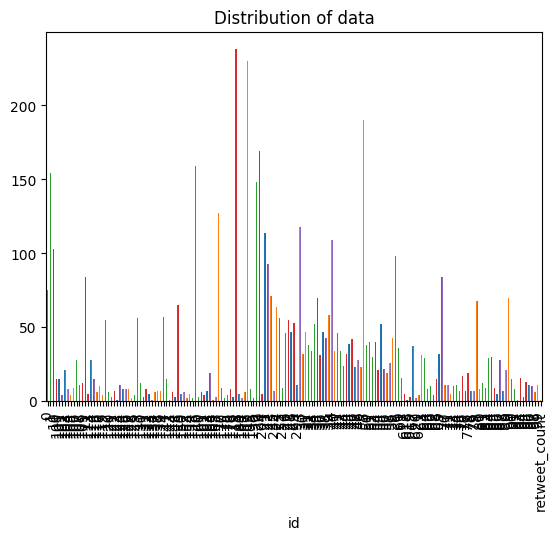

In [13]:
# Plotting the distribution for dataset.
ax = df.groupby('id').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['India','Australia'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['location']), list(df['id'])

<AxesSubplot:xlabel='id', ylabel='count'>

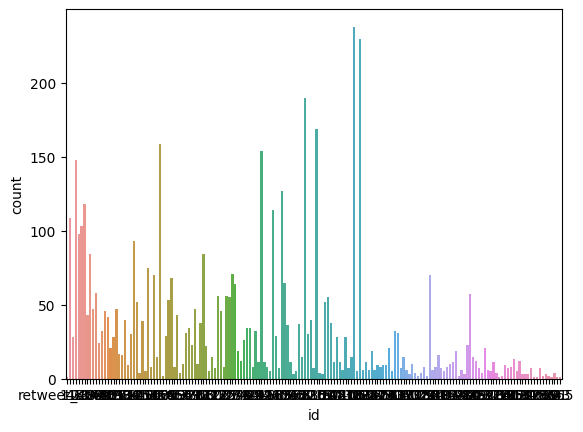

In [15]:
import seaborn as sns
sns.countplot(x='id', data=df)

In [24]:
data=df[['user_description','id']]

In [25]:
data['id'] = data['id'].replace(4,1)

C:\Users\prashant pandey\AppData\Local\Temp\ipykernel_28740\2160326561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['id'] = data['id'].replace(4,1)


In [26]:
data['id'].unique()

array(['iso_language_code', 'en'], dtype=object)

In [27]:
data_pos = data[data['id'] == 1]
data_neg = data[data['id'] == 0]


In [28]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

In [29]:
dataset = pd.concat([data_pos, data_neg])

In [30]:
dataset['user_description']=dataset['user_description'].str.lower()
dataset['user_description'].tail()

Series([], Name: user_description, dtype: object)

In [31]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [32]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['user_description'] = dataset['user_description'].apply(lambda text: cleaning_stopwords(text))
dataset['user_description'].head()

Series([], Name: user_description, dtype: object)

In [33]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['user_description']= dataset['user_description'].apply(lambda x: cleaning_punctuations(x))
dataset['user_description'].tail()

Series([], Name: user_description, dtype: object)

In [34]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['user_description'] = dataset['user_description'].apply(lambda x: cleaning_repeating_char(x))
dataset['user_description'].tail()

Series([], Name: user_description, dtype: object)

In [35]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['user_description'] = dataset['user_description'].apply(lambda x: cleaning_URLs(x))
dataset['user_description'].tail()

Series([], Name: user_description, dtype: object)

In [36]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['user_description'] = dataset['user_description'].apply(lambda x: cleaning_numbers(x))
dataset['user_description'].tail()

Series([], Name: user_description, dtype: object)

In [37]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'w+')
dataset['user_description'] = dataset['user_description'].apply(tokenizer.tokenize)
dataset['user_description'].head()

Series([], Name: user_description, dtype: object)

In [38]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['user_description']= dataset['user_description'].apply(lambda x: stemming_on_text(x))
dataset['user_description'].head()

Series([], Name: user_description, dtype: object)

In [39]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['user_description'] = dataset['user_description'].apply(lambda x: lemmatizer_on_text(x))
dataset['user_description'].head()

Series([], Name: user_description, dtype: object)

In [40]:
X=data.user_description
y=data.id

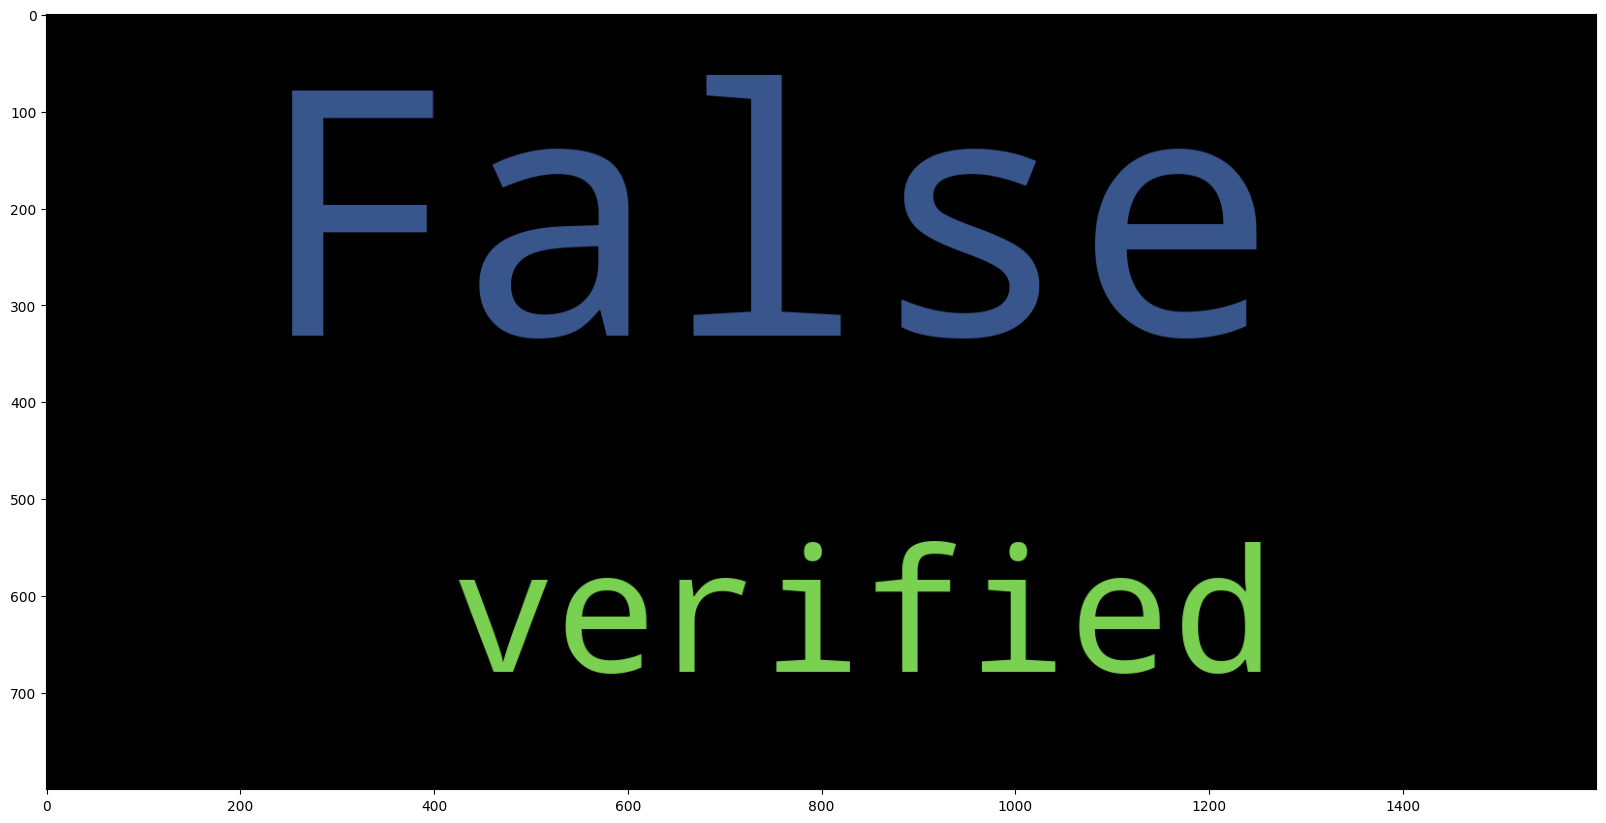

In [47]:
data_neg = data['user_description'][:600]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

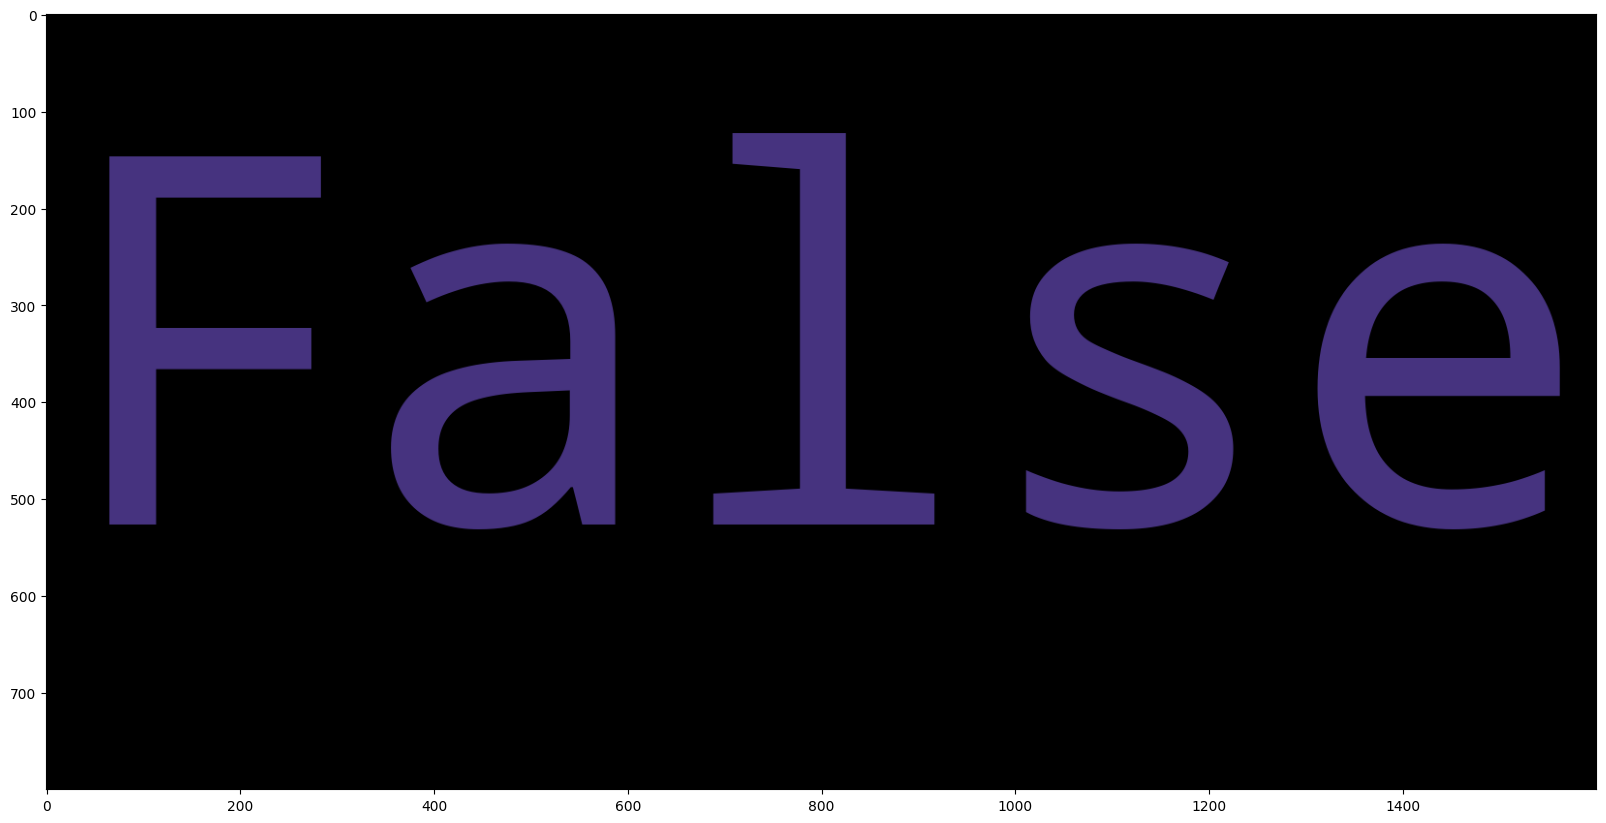

In [48]:
data_pos = data['user_description'][100:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

In [49]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

In [50]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  2


c:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [51]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [55]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
# Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
# Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [56]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

              precision    recall  f1-score   support

          en       1.00      1.00      1.00       262

    accuracy                           1.00       262
   macro avg       1.00      1.00      1.00       262
weighted avg       1.00      1.00      1.00       262



ValueError: cannot reshape array of size 1 into shape (2,2)

In [63]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

              precision    recall  f1-score   support

          en       1.00      1.00      1.00       262

    accuracy                           1.00       262
   macro avg       1.00      1.00      1.00       262
weighted avg       1.00      1.00      1.00       262



ValueError: cannot reshape array of size 1 into shape (2,2)

In [64]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

NameError: name 'y_pred2' is not defined

In [65]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

              precision    recall  f1-score   support

          en       1.00      1.00      1.00       262

    accuracy                           1.00       262
   macro avg       1.00      1.00      1.00       262
weighted avg       1.00      1.00      1.00       262



ValueError: cannot reshape array of size 1 into shape (2,2)